In [13]:
import pandas as pd
import seaborn as sns

In [14]:
df = pd.read_csv(r'D:\task\mxmh_survey_results.csv')

In [15]:
df.head(4)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.


In [16]:
uniq_st = df['Primary streaming service'].unique()
print(uniq_st)

['Spotify' 'Pandora' 'YouTube Music' 'I do not use a streaming service.'
 'Apple Music' 'Other streaming service' nan]


Статистика по времени прослушивания:
Среднее: 3.6 часов
Максимум: 24.0 часов
Слушателей от 0 до 5 часов в день: 602, или 81.79 % опрошенных


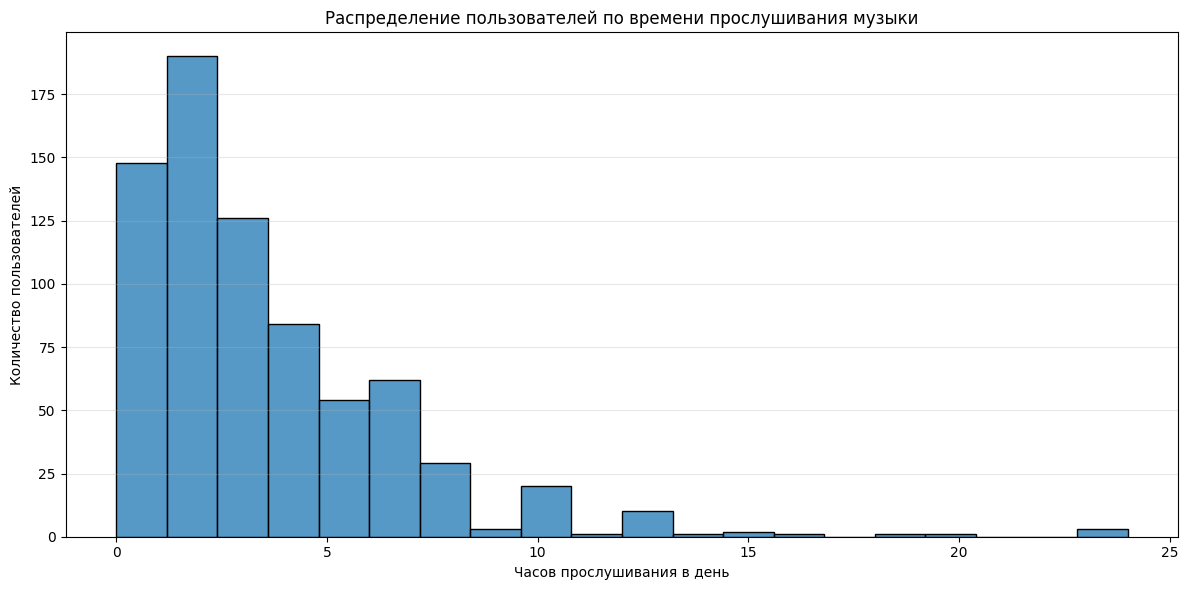

In [17]:
c = sns.histplot(data=df, x='Hours per day', bins=20)
c.figure.set_size_inches(12, 6)
c.set_title('Распределение пользователей по времени прослушивания музыки')
c.set_xlabel('Часов прослушивания в день')
c.set_ylabel('Количество пользователей')
c.grid(axis='y', alpha=0.3)
c.figure.tight_layout()
print("Статистика по времени прослушивания:")
print(f"Среднее: {df['Hours per day'].mean():.1f} часов")
print(f"Максимум: {df['Hours per day'].max()} часов")
count_0_to_5 = ((df['Hours per day'] >= 0) & (df['Hours per day'] <= 5)).sum()
count_total = df['Hours per day'].count()
pers = (count_0_to_5 / count_total * 100).round(2)
print(f"Слушателей от 0 до 5 часов в день: {count_0_to_5}, или {pers} % опрошенных")


На данном графике видно, что приобладающее большинство опрошенных слушает музыку в диапазоне от 0 до 5 часов в день.


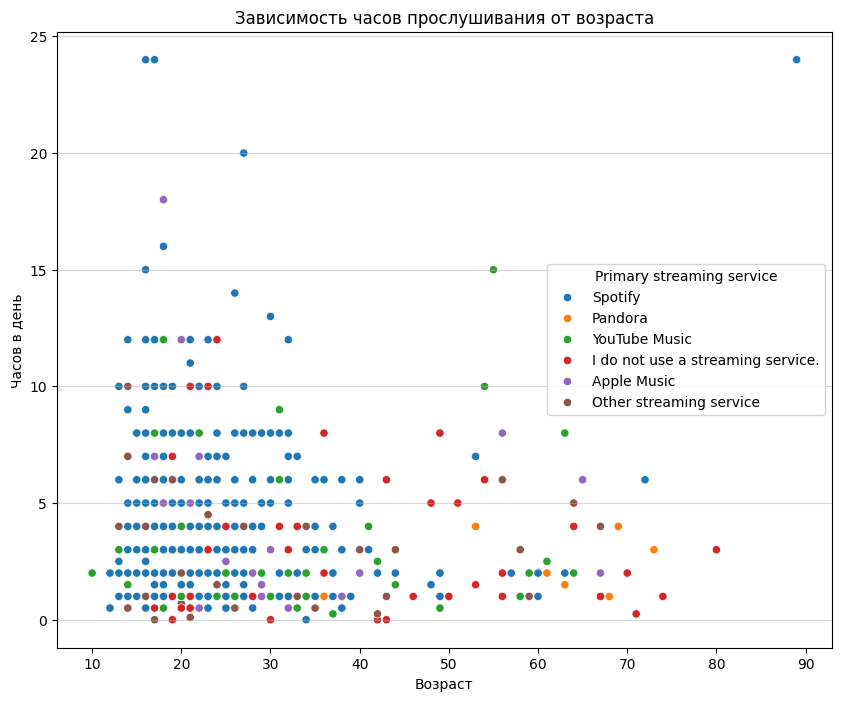

In [18]:
v = sns.scatterplot(
                data=df, 
                x="Age", 
                y="Hours per day", 
                hue="Primary streaming service")
v.figure.set_size_inches(10,8)
v.set_title('Зависимость часов прослушивания от возраста')
v.set_xlabel('Возраст')
v.set_ylabel('Часов в день')
v.grid(axis='y', alpha=0.5)

Молодые пользователи (до 30 лет) имеют более широкий разброс в часах прослушивания и чаще используют Spotify, в то время как пользователи старшего возраста могут иметь другие предпочтения при выборе сервиса в среднем тратят меньшее количество часов на прослушивание музыки.

2.0826840614391386


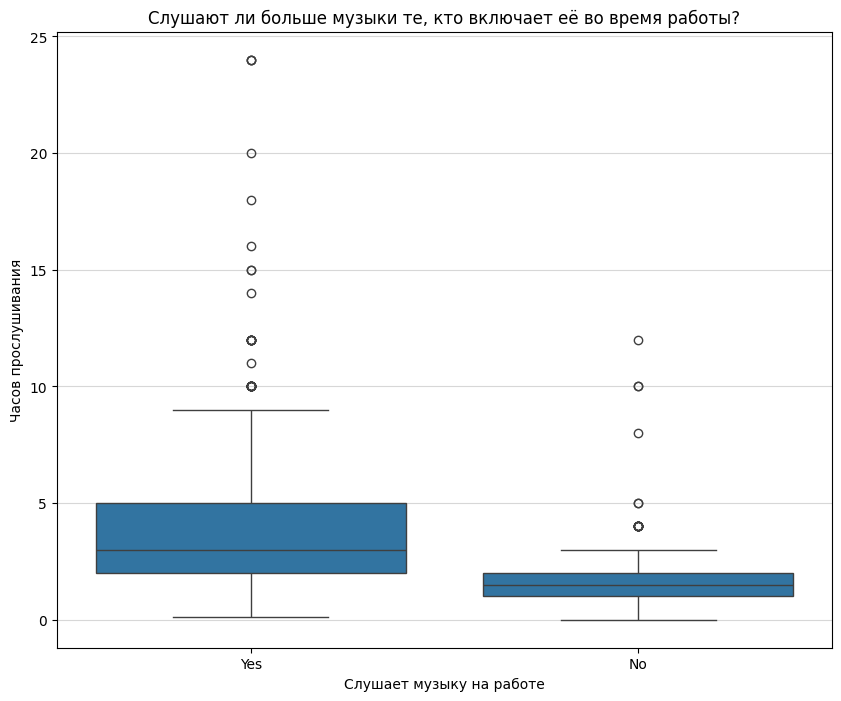

In [19]:
z = sns.boxplot(data=df, 
                x='While working', 
                y='Hours per day')
z.figure.set_size_inches(10, 8)
z.set_title('Слушают ли больше музыки те, кто включает её во время работы?')
z.set_xlabel('Слушает музыку на работе')
z.set_ylabel('Часов прослушивания')
z.grid(axis='y', alpha=0.5)


work_hours = df[df['While working'] == 'Yes']['Hours per day'].mean()
no_work_hours = df[df['While working'] == 'No']['Hours per day'].mean()
ratio = work_hours / no_work_hours
print(ratio)

Люди, которые слушают музыку во время работы в 2,1 раза больше времени слушают музыку в целом, чем люди, которые слушают ее вне работы.

Age_Group
0-18       153
19-25      356
26-35      129
36-45       41
46-55       16
56+         40
Unknown      1
Name: count, dtype: int64
Молодежь (0-25 лет) составляет 69.2% аудитории


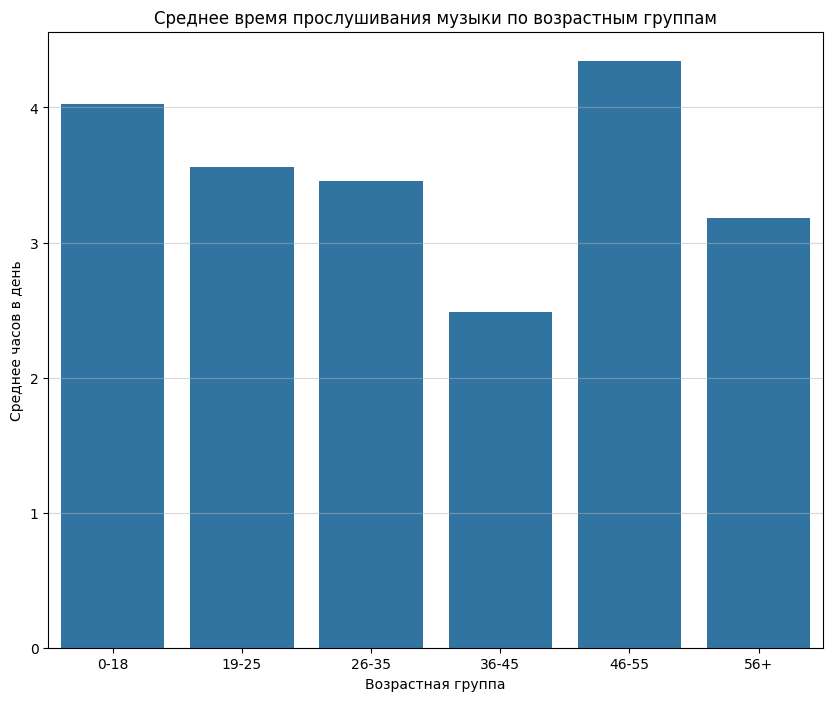

In [ ]:
def get_age_group(age):
    try:
        age_float = float(age)
        if pd.isna(age_float):
            return 'Unknown'
        elif 0 <= age_float < 18:
            return '0-18'
        elif 18 <= age_float <= 25:
            return '19-25'
        elif 26 <= age_float <= 35:
            return '26-35'
        elif 36 <= age_float <= 45:
            return '36-45'
        elif 46 <= age_float <= 55:
            return '46-55'
        elif age_float > 55:
            return '56+'
        else:
            return 'Unknown'
    except:
        return 'Unknown'

df['Age_Group'] = df['Age'].apply(get_age_group)
age_order = ['0-18', '19-25', '26-35', '36-45', '46-55', '56+']

x = sns.barplot(data=df, 
                x='Age_Group', 
                y='Hours per day', 
                errorbar=None, 
                order=age_order)
x.figure.set_size_inches(10, 8)
x.set_title('Среднее время прослушивания музыки по возрастным группам')
x.set_xlabel('Возрастная группа')
x.set_ylabel('Среднее часов в день')
x.grid(axis='y', alpha=0.5)

print(df['Age_Group'].value_counts().sort_index())
young_count = df[df['Age_Group'].isin(['0-18', '19-25'])].shape[0]
young_audience = (young_count / len(df)) * 100
print(f"Молодежь (0-25 лет) составляет {young_audience:.1f}% аудитории")

Опрос был направлен на более молодую аудиторию, 69,2% опрашиваемых людей возрастом до 25 лет, что говорит о большей вовлеченности со стороны молодежи.

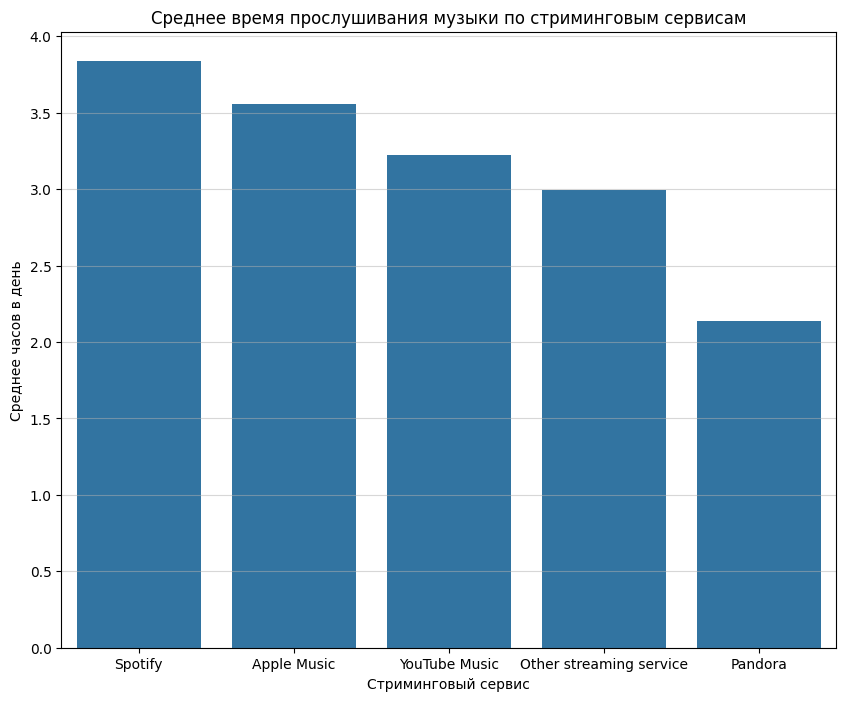

In [21]:
streaming_stats = df.groupby('Primary streaming service')['Hours per day'].agg(['mean'])
streaming_stats = streaming_stats.drop('I do not use a streaming service.', errors='ignore')
streaming_stats = streaming_stats.sort_values('mean', ascending=False)
plot_data = streaming_stats.reset_index()

g = sns.barplot(data=plot_data, x='Primary streaming service', y='mean')
g.figure.set_size_inches(10, 8)
g.set_title('Среднее время прослушивания музыки по стриминговым сервисам')
g.set_ylabel('Среднее часов в день')
g.set_xlabel('Стриминговый сервис')
g.grid(axis='y', alpha=0.5)

Spotify лидирует по вовлеченности пользователей с показателем 3.8 часов в день, опережая ближайших конкурентов на 0.5-0.6 часа.

### Ключевые выводы

- Большинство респондентов слушают музыку до 5 часов в день — в основном в фоновом режиме.  
- Возраст — главный фактор различий: молодые пользователи слушают больше, а в группе 36–45 лет наблюдается спад.  
- Spotify доминирует среди младшей аудитории и коррелирует с более высоким временем прослушивания.  
- Те, кто слушает музыку во время работы, проводят с ней больше часов в день.  
______________________________________________________________________________________________________________________
